In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
df_train = pd.read_csv('SBI_train.csv')
df_train

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-01,225.000000,228.899994,224.500000,227.800003,217.400299,6449426
1,2016-01-04,226.949997,226.949997,220.050003,220.699997,210.624420,14092071
2,2016-01-05,222.800003,222.800003,217.000000,217.750000,207.809097,15074848
3,2016-01-06,217.899994,219.899994,216.399994,216.850006,206.950195,11921123
4,2016-01-07,214.000000,214.100006,209.000000,209.550003,199.983444,14342279
...,...,...,...,...,...,...,...
1476,2021-12-24,462.600006,463.600006,452.200012,456.950012,449.928375,13221159
1477,2021-12-27,453.700012,460.500000,450.549988,458.049988,451.011444,8856482
1478,2021-12-28,461.200012,462.899994,459.049988,461.200012,454.113068,8832210
1479,2021-12-29,461.000000,462.149994,451.399994,454.399994,447.417542,11757303


In [30]:
df_train.dropna(inplace=True)

In [31]:
x = np.array(df_train['Open'])

In [32]:
x = x.reshape(-1,1)

In [33]:
x

array([[225.      ],
       [226.949997],
       [222.800003],
       ...,
       [461.200012],
       [461.      ],
       [452.75    ]])

In [34]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
scaled_x = sc.fit_transform(x)

In [35]:
scaled_x

array([[0.19098039],
       [0.19607842],
       [0.18522877],
       ...,
       [0.80849674],
       [0.80797383],
       [0.78640521]])

In [36]:
timesteps = 180

In [37]:
X_train = []
y_train = []
for i in range(timesteps,len(df_train)):
    X_train.append(scaled_x[i-timesteps:i,0])
    y_train.append(scaled_x[i,0])
X_train,y_train=np.array(X_train),np.array(y_train)

In [38]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [39]:
X_train

array([[[0.19098039],
        [0.19607842],
        [0.18522877],
        ...,
        [0.26810457],
        [0.27699345],
        [0.27934637]],

       [[0.19607842],
        [0.18522877],
        [0.17241829],
        ...,
        [0.27699345],
        [0.27934637],
        [0.26666666]],

       [[0.18522877],
        [0.17241829],
        [0.16222222],
        ...,
        [0.27934637],
        [0.26666666],
        [0.26457515]],

       ...,

       [[0.52104574],
        [0.54653593],
        [0.52928102],
        ...,
        [0.80797383],
        [0.81215685],
        [0.7888889 ]],

       [[0.54653593],
        [0.52928102],
        [0.50209149],
        ...,
        [0.81215685],
        [0.7888889 ],
        [0.80849674]],

       [[0.52928102],
        [0.50209149],
        [0.47071894],
        ...,
        [0.7888889 ],
        [0.80849674],
        [0.80797383]]])

In [40]:
y_train

array([0.26666666, 0.26457515, 0.25633987, ..., 0.80849674, 0.80797383,
       0.78640521])

In [41]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [42]:
regressor = Sequential()

In [43]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [44]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [45]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [46]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [47]:
regressor.add(Dense(units = 1))

In [48]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [49]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
41/41 [==============================] - 20s 251ms/step - loss: 0.0209
Epoch 2/100
41/41 [==============================] - 10s 247ms/step - loss: 0.0068
Epoch 3/100
41/41 [==============================] - 10s 245ms/step - loss: 0.0060
Epoch 4/100
41/41 [==============================] - 11s 280ms/step - loss: 0.0055
Epoch 5/100
41/41 [==============================] - 10s 246ms/step - loss: 0.0046
Epoch 6/100
41/41 [==============================] - 10s 243ms/step - loss: 0.0049
Epoch 7/100
41/41 [==============================] - 10s 247ms/step - loss: 0.0044
Epoch 8/100
41/41 [==============================] - 10s 250ms/step - loss: 0.0041
Epoch 9/100
41/41 [==============================] - 10s 246ms/step - loss: 0.0037
Epoch 10/100
41/41 [==============================] - 10s 244ms/step - loss: 0.0035
Epoch 11/100
41/41 [==============================] - 10s 244ms/step - loss: 0.0038
Epoch 12/100
41/41 [==============================] - 10s 249ms/step - loss: 0.0037
E

41/41 [==============================] - 11s 257ms/step - loss: 0.0010
Epoch 99/100
41/41 [==============================] - 11s 260ms/step - loss: 0.0010
Epoch 100/100
41/41 [==============================] - 11s 257ms/step - loss: 8.6116e-04


In [50]:
#Input through the user
days_to_pred = 30

In [51]:
df_test = pd.read_csv('SBI_test.csv')
real_openprice = df_test.iloc[:days_to_pred, 1:2].values

In [52]:
dataset_total = pd.concat((df_train['Open'], df_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(df_test) - timesteps:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(timesteps, timesteps+days_to_pred):
    X_test.append(inputs[i-timesteps:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 5s 5s/step


Upward trend


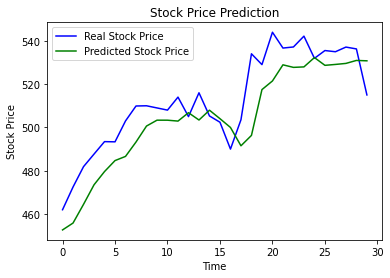

In [55]:
plt.plot(real_openprice, color = 'blue', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()

if predicted_stock_price[0]<=predicted_stock_price[-1]:
    print("Upward trend")
else:
    print("Downward trend")

In [56]:
predicted_stock_price

array([[452.68304],
       [455.85394],
       [464.50034],
       [473.52258],
       [479.6326 ],
       [484.69687],
       [486.62277],
       [493.26642],
       [500.6361 ],
       [503.35352],
       [503.3419 ],
       [502.92926],
       [506.7974 ],
       [503.4271 ],
       [507.95084],
       [504.04044],
       [499.98773],
       [491.52563],
       [496.32108],
       [517.46893],
       [521.4557 ],
       [528.90894],
       [527.72815],
       [527.94965],
       [532.25653],
       [528.6722 ],
       [529.0873 ],
       [529.55975],
       [530.9329 ],
       [530.7568 ]], dtype=float32)